# Module QTL and pQTL Credible Sets

**Created**: 24 June 2022

## Environment

In [1]:
library(tidyverse)
library(data.table)
library(ComplexHeatmap)
library(circlize)

setwd("~/eQTL_pQTL_Characterization/")

source("01_Colocalization/scripts/utils/ggplot_theme.R")

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Loading required package: grid

ComplexHeatmap version 2.6.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.c

## Module QTL

### Load Data

In [2]:
mqtl <- readRDS("~/gains_team282/nikhil/expression/eigengene_sva/mqtl.RDS") %>%
    dplyr::group_by(module.qtl) %>%
    dplyr::slice_min(p, n=1, with_ties=F)

In [3]:
ld.tags <- fread("~/gains_team282/nikhil/colocalization/cis_eqtl/fine_mapping/LD/module_qtl_snps.80r2.tags.tsv") %>%
    dplyr::mutate(NTAG = NTAG + 1) %>%
    dplyr::mutate(SNP = gsub(":", "\\.", SNP)) %>%
    merge(mqtl, ., by.x="snp", by.y="SNP")

In [4]:
head(ld.tags)

,snp,beta,se,t,p,module.qtl,module,pc,qtl.locus,qtl.locus.chr,qtl.locus.start,qtl.locus.end,CHR,BP,NTAG,LEFT,RIGHT,KBSPAN,TAGS
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>
1,rs10102731,0.013791130,0.001211166,11.386653,5.952716e-27,ME_82_5-8:758509-2772923,ME_82,5,8:758509-2772923,8,758509,2772923,8,1760854,19,1757875,1768870,10.996,rs7842425|rs7846610|rs6558531|rs7838456|rs730377|rs4372027|rs4639549|rs730379|rs4370560|rs7460287|rs6558532|rs4876133|rs6558535|rs9022|rs71499040|rs7461600|rs7000162|rs11136424
2,rs10185660,-0.012448741,0.001888039,-6.593479,8.942065e-11,ME_79_5-2:87163718-89163717,ME_79,5,2:87163718-89163717,2,87163718,89163717,2,88163718,1,88163718,88163718,0.001,NONE
3,rs10204661,0.022565851,0.002163238,10.431515,1.196171e-23,ME_91_5-2:48583292-50593069,ME_91,5,2:48583292-50593069,2,48583292,50593069,2,49610377,28,49574097,49617654,43.558,rs13385302|rs72829071|rs67439369|rs13422391|rs145101627|rs111692634|rs1587367|rs1827081|rs13410249|rs66994500|rs1498798|rs72829088|rs67284527|rs17039056|rs1498800|rs12053201|rs2162518|rs4482528|rs12052379|rs13388647|rs13428781|rs2081739|rs1391745|rs56178651|rs56102385|rs10183678|rs10432669
4,rs1023252,-0.008765743,0.001058973,-8.277586,7.905607e-16,ME_62_4-1:10790946-12845916,ME_62,4,1:10790946-12845916,1,10790946,12845916,1,11838976,3,11790946,11838976,48.031,rs3818762|rs1476413
5,rs106968,-0.136301897,0.002125930,-64.114007,2.370055e-281,ME_90_4-1:6809988-8943003,ME_90,4,1:6809988-8943003,1,6809988,8943003,1,7914484,56,7899009,7941406,42.398,rs58969455|rs60053761|rs58911040|rs12403520|rs12404402|rs72550038|rs12563693|rs12564368|rs12404742|rs12403908|rs75866446|rs12404752|rs78617231|rs12068202|rs76391507|rs12407642|rs10489448|rs12405361|rs12405385|rs12405387|rs12404522|rs79314241|rs77615777|rs78539762|rs664689|rs666068|rs161805|rs161803|rs12564367|rs226479|rs161824|rs161825|rs161826|rs226480|rs161827|rs11121054|rs226481|rs226482|rs226483|rs161818|rs161819|rs161820|rs161821|rs161822|rs226484|rs226485|rs226486|rs161823|rs537801|rs531329|rs9657975|rs161813|rs161811|rs161810|rs519546
6,rs11045643,-0.007639117,0.001153445,-6.622869,7.064571e-11,ME_95_1-12:7472294-9515684,ME_95,1,12:7472294-9515684,12,7472294,9515684,12,8479660,15,8472294,8490033,17.740,rs7976958|rs4334073|rs4883164|rs113154236|rs75944521|rs10770775|rs10770776|rs11045708|rs12304190|rs12308954|rs12302854|rs12322968|rs7964875|rs11045757


In [5]:
susie.snps <- read.table("~/gains_team282/nikhil/colocalization/mqtl/fine_mapping/SuSiE/module_qtl_credible_sets.tsv", sep="\t", header=T) %>%
    as.data.frame() %>%
    dplyr::filter(is.na(Notes)) %>%
    dplyr::select(-Notes) %>%
    dplyr::mutate(ME=gsub("-.*", "", Gene)) %>%
    dplyr::mutate(qtl.locus=gsub("ME_[0-9]*_[0-9]-", "", Gene)) %>%
    dplyr::mutate(qtl.locus.chr=gsub(":.*", "", qtl.locus)) %>%
    dplyr::mutate(qtl.locus.start=gsub("-.*", "", gsub(".*:", "", qtl.locus))) %>%
    dplyr::mutate(qtl.locus.end=gsub(".*-", "", gsub(".*:", "", qtl.locus)))

In [6]:
head(susie.snps)

,Gene,SNP,SNP_Prob,Credible_Set,ME,qtl.locus,qtl.locus.chr,qtl.locus.start,qtl.locus.end
,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,ME_54_4-3:43721338-45721337,rs56084453,0.99982909,1,ME_54_4,3:43721338-45721337,3,43721338,45721337
2,ME_61_2-16:29176355-31186829,rs1132812,0.62937906,1,ME_61_2,16:29176355-31186829,16,29176355,31186829
3,ME_61_2-16:29176355-31186829,rs12373078,0.36433025,1,ME_61_2,16:29176355-31186829,16,29176355,31186829
4,ME_101_3-12:54985643-57100037,rs1131017,0.99974616,1,ME_101_3,12:54985643-57100037,12,54985643,57100037
5,ME_61_3-16:29176355-31186829,rs1132812,0.99123804,1,ME_61_3,16:29176355-31186829,16,29176355,31186829
6,ME_54_5-3:43721338-45721337,rs2034476,0.01584294,1,ME_54_5,3:43721338-45721337,3,43721338,45721337


For the FINEMAP result from each module QTL, we chose the $k$ that has the maximum posterior probability.

In [7]:
finemap.snps <- fread("~/gains_team282/nikhil/colocalization/mqtl/fine_mapping/FINEMAP/module_qtl_credible_sets.tsv", sep="\t", header=TRUE) %>%
    as.data.frame() %>%
    dplyr::group_by(Module_QTL) %>%
    dplyr::filter(Post_Prob_k == max(Post_Prob_k))

In [8]:
head(finemap.snps)

Module_QTL,k,Post_Prob_k,Credibility_Set,Credibility_Set_Min_LD,Credibility_Set_Mean_LD,Credibility_Set_Median_LD,SNP,Prob_SNP_in_CS
<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
ME_100_1-2:177556567-179584183,1,1,1,5.11995e-23,0.0899352,0.0490299,rs16866439,0.00249248
ME_100_1-2:177556567-179584183,1,1,1,5.11995e-23,0.0899352,0.0490299,rs34447229,0.00244538
ME_100_1-2:177556567-179584183,1,1,1,5.11995e-23,0.0899352,0.0490299,rs2244492,0.00242585
ME_100_1-2:177556567-179584183,1,1,1,5.11995e-23,0.0899352,0.0490299,rs6716304,0.00224558
ME_100_1-2:177556567-179584183,1,1,1,5.11995e-23,0.0899352,0.0490299,rs7573293,0.00198607
ME_100_1-2:177556567-179584183,1,1,1,5.11995e-23,0.0899352,0.0490299,rs10190741,0.00189626


### Compare Credible Sets

Of the 380 eigengene-locus pairs, 186 have a CS using SuSiE. The initial anlaysis from FINEMAP assigns a CS to each eigengene-locus pair. When using the purity filter, there are 191 FINEMAP CSs.

In [9]:
susie.snps %>%
    dplyr::count(Gene) %>%
    nrow()

[1] 186

In [10]:
finemap.snps %>%
    dplyr::count(Module_QTL) %>%
    nrow()

[1] 380

In [11]:
finemap.snps %>%
    dplyr::filter(Credibility_Set_Min_LD >= 0.5) %>%
    dplyr::count(Module_QTL) %>%
    nrow()

[1] 191

How many signals are we detecting per pair? Are they concordant between the two methods?

In [12]:
cs.freq.mtx <- merge(
    susie.snps %>%
        dplyr::select(Module_QTL=Gene, Credible_Set) %>%
        dplyr::group_by(Module_QTL) %>%
        dplyr::summarize(SuSiE.CSs=length(unique(Credible_Set))),
    finemap.snps %>%
        dplyr::filter(Credibility_Set_Min_LD >= 0.5) %>%
        dplyr::group_by(Module_QTL) %>%
        dplyr::summarize(FINEMAP.CSs=length(unique(Credibility_Set))),
    by="Module_QTL"
) %>%
    dplyr::mutate(SuSiE.CSs=factor(SuSiE.CSs, levels=1:10)) %>%
    dplyr::mutate(FINEMAP.CSs=factor(FINEMAP.CSs, levels=1:10)) %>%
    dplyr::count(SuSiE.CSs, FINEMAP.CSs, .drop=F) %>%
    tidyr::spread(FINEMAP.CSs, n)

rownames(cs.freq.mtx) <- cs.freq.mtx$SuSiE.CSs
cs.freq.mtx$SuSiE.CSs <- NULL
cs.freq.mtx <- as.matrix(cs.freq.mtx)

In [13]:
sum(cs.freq.mtx)

[1] 174

In [14]:
options(repr.plot.width=6.5, repr.plot.height=6)

col_fun = colorRamp2(c(0, max(cs.freq.mtx)), c("white", "lightsteelblue2"))

column_ha = HeatmapAnnotation(
    FINEMAP = anno_barplot(
        colSums(cs.freq.mtx), border=F, bar_width=1, height=unit(2.5, "cm"), 
        gp=gpar(fill="lightsteelblue2", col=NA)
    ),
    show_annotation_name=F
)
row_ha = rowAnnotation(
    SuSiE = anno_barplot(
        rowSums(cs.freq.mtx), border=F, bar_width=1, width=unit(2.5, "cm"),
        gp=gpar(fill="lightsteelblue2", col=NA)
    ),
    show_annotation_name=F
)

pdf("01_Colocalization/results/module_qtl_n_signals.pdf", width=6.5, height=6)
Heatmap(
    cs.freq.mtx, name="Signals",
    col=col_fun,
    cluster_rows=F, cluster_columns=F,
    top_annotation=column_ha, right_annotation=row_ha,
    row_names_side="left", column_title_side="bottom",
    rect_gp=gpar(col="black", lwd=0.5),
    row_title="Signals from SuSiE", column_title="Signals from FINEMAP",
    cell_fun = function(j, i, x, y, width, height, fill) {
        grid.text(sprintf("%d", cs.freq.mtx[i, j]), x, y, gp=gpar(fontsize=10))
    }
)
dev.off()

png 
  2

![](../results/module_qtl_n_signals.svg)

How different are the CS sizes?

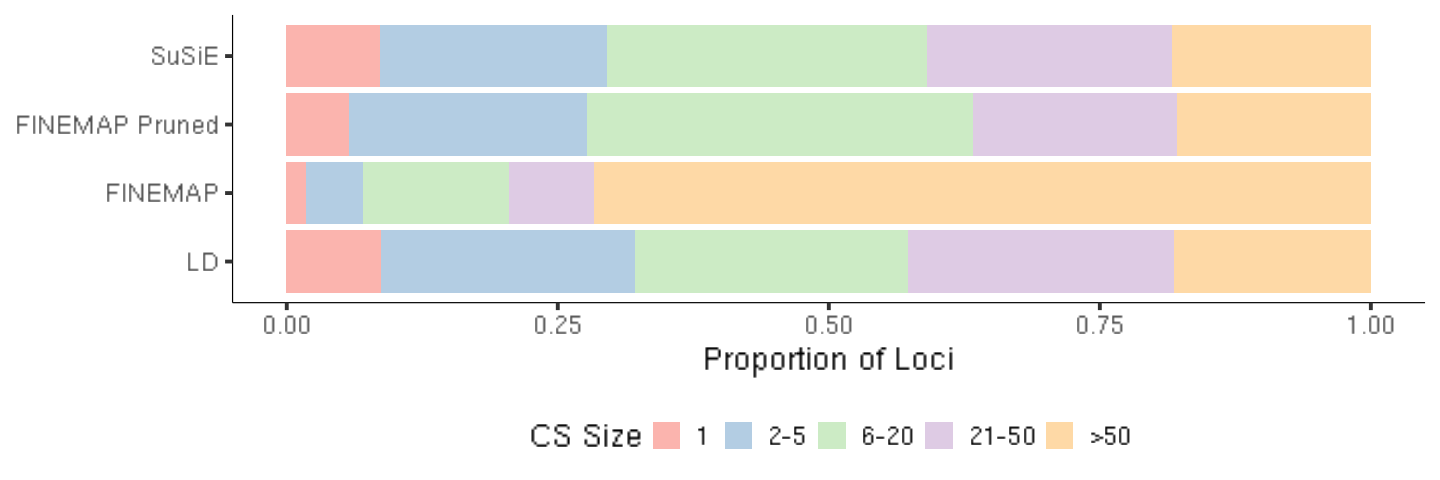

In [15]:
options(repr.plot.width=12, repr.plot.height=4)

dplyr::bind_rows(
    ld.tags %>%
        dplyr::mutate(Method="LD") %>%
        dplyr::select(Method, Module.QTL=module.qtl, N.SNPs=NTAG),
    susie.snps %>%
        dplyr::count(Gene) %>%
        dplyr::mutate(Method="SuSiE") %>%
        dplyr::select(Method, Module.QTL=Gene, N.SNPs=n),
    finemap.snps %>%
        dplyr::filter(Credibility_Set_Min_LD >= 0.5) %>%
        dplyr::count(Module_QTL) %>%
        dplyr::mutate(Method="FINEMAP Pruned") %>%
        dplyr::select(Method, Module.QTL=Module_QTL, N.SNPs=n),
    finemap.snps %>%
        dplyr::count(Module_QTL) %>%
        dplyr::mutate(Method="FINEMAP") %>%
        dplyr::select(Method, Module.QTL=Module_QTL, N.SNPs=n)
) %>%
    dplyr::mutate(CS.Size=cut(N.SNPs, breaks=c(0, 1, 5, 20, 50, Inf), labels=c("1", "2-5", "6-20", "21-50", ">50"), include.lowest=F)) %>%
    dplyr::mutate(Method=factor(Method, levels=c("LD", "FINEMAP", "FINEMAP Pruned", "SuSiE"))) %>%
    dplyr::group_by(Method, CS.Size) %>%
    dplyr::summarize(N=n(), .groups="drop") %>%
    dplyr::group_by(Method) %>%
    dplyr::mutate(Freq=N / sum(N)) %>%
    ggplot() +
    geom_bar(aes(x=Method, y=Freq, fill=CS.Size), stat="identity", position=position_stack(reverse=T)) +
    scale_fill_brewer("CS Size", palette="Pastel1") +
    ylab("Proportion of Loci") +
    coord_flip() +
    ggplot_theme +
    theme(axis.title.y=element_blank())

ggsave("01_Colocalization/results/module_qtl_cs_sizes.pdf", width=12, height=4)

### Paired Tests of Credible Sets

Combine all credible set sizes based on SuSiE results to perform paired tests.

In [16]:
cs.sizes <- merge(
    susie.snps %>%
        dplyr::count(Gene, name="SuSiE.N.SNPs") %>%
        dplyr::select(Module_QTL=Gene, SuSiE.N.SNPs),
    finemap.snps %>%
        dplyr::filter(Credibility_Set_Min_LD >= 0.5) %>%
        dplyr::count(Module_QTL, name="FINEMAP.N.SNPs"),
    by=c("Module_QTL")
) %>%
    merge(., ld.tags, by.x=c("Module_QTL"), by.y=c("module.qtl")) %>%
    dplyr::select(Module_QTL, SuSiE.N.SNPs, FINEMAP.N.SNPs, NTAG)

In [17]:
dim(cs.sizes)

[1] 159   4

The median size of the LD snp sets is much higher than FINEMAP and SuSiE when using the SuSiE pruned set. The FINEMAP median is much higher by itself (23) and the LD snp sets are actually smaller (12).

In [18]:
cs.sizes %>%
    tidyr::gather(key="Method", value="N.SNPs", -Module_QTL) %>%
    dplyr::group_by(Method) %>%
    dplyr::summarize(Median.CS.Size=median(N.SNPs))

Method,Median.CS.Size
<chr>,<dbl>
FINEMAP.N.SNPs,14
NTAG,15
SuSiE.N.SNPs,14


In [19]:
wilcox.test(cs.sizes$NTAG, cs.sizes$SuSiE.N.SNPs, paired=TRUE)


	Wilcoxon signed rank test with continuity correction

data:  cs.sizes$NTAG and cs.sizes$SuSiE.N.SNPs
V = 5891.5, p-value = 0.06828
alternative hypothesis: true location shift is not equal to 0


In [20]:
wilcox.test(cs.sizes$NTAG, cs.sizes$FINEMAP.N.SNPs, paired=TRUE)


	Wilcoxon signed rank test with continuity correction

data:  cs.sizes$NTAG and cs.sizes$FINEMAP.N.SNPs
V = 5971.5, p-value = 0.004327
alternative hypothesis: true location shift is not equal to 0


In [21]:
wilcox.test(cs.sizes$SuSiE.N.SNPs, cs.sizes$FINEMAP.N.SNPs, paired=TRUE)


	Wilcoxon signed rank test with continuity correction

data:  cs.sizes$SuSiE.N.SNPs and cs.sizes$FINEMAP.N.SNPs
V = 1770, p-value = 0.9482
alternative hypothesis: true location shift is not equal to 0


## cis-pQTL

### Load Data

In [22]:
cis.pqtl <- readRDS("~/gains_team282/proteomics/pqtl/pqtl_ms2019/cis_pqtl_sig.RDS") %>%
    dplyr::group_by(pQTL_Protein) %>%
    dplyr::slice_min(pQTL_pval, n=1, with_ties=F)

In [23]:
ld.tags <- fread("~/gains_team282/nikhil/colocalization/cis_eqtl/fine_mapping/LD/cis_pqtl_snps.80r2.tags.tsv") %>%
    dplyr::mutate(NTAG = NTAG + 1) %>%
    dplyr::mutate(SNP = gsub(":", "\\.", SNP)) %>%
    merge(cis.pqtl, ., by="SNP")

In [24]:
head(ld.tags)

,SNP,Chr,Position,pQTL_beta,pQTL_SE,pQTL_t,pQTL_pval,pQTL_Protein,Gene,CHR,BP,NTAG,LEFT,RIGHT,KBSPAN,TAGS
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>
1,rs10753610,1,161694033,-0.31908720,0.02841617,-11.229071,1.200348e-27,O75015,ENSG00000162747,1,161694033,5,161690055,161695375,5.321,rs7539053|rs1340976|rs3949343|rs4656328
2,rs10947319,6,32613677,0.20351031,0.02761147,7.370499,3.380114e-13,P0C0L5,ENSG00000224389,6,32613677,23,32598202,32623261,25.060,rs28383172|rs2647060|rs2647063|rs2858869|rs2647073|rs12206257|rs17840121|rs13206219|rs13206639|rs13212015|rs28383216|rs12192104|rs13204672|rs13204933|rs28383225|rs28383228|rs28383263|rs28383264|rs28383270|rs28383271|rs28383272|rs28383319
3,rs11132382,4,186222648,-0.08357244,0.01080930,-7.731532,2.951792e-14,P03952,ENSG00000164344,4,186222648,23,186218785,186253529,34.745,rs12331618|rs4862669|rs2048|rs4253238|rs1912826|rs3775298|rs1511801|rs4241815|rs4241816|rs4241817|rs4241818|rs4253248|rs4253252|rs3733402|rs4253254|rs4253255|rs66530140|rs35984397|rs4253281|rs4253282|rs1973612|rs4253311
4,rs1243162,14,94380606,-0.47386203,0.02749184,-17.236459,8.174763e-59,P01009,ENSG00000197249,14,94380606,4,94377968,94381078,3.111,rs1243165|rs1243164|rs6647
5,rs13100791,3,49603616,-0.49195720,0.05375028,-9.152644,2.290194e-19,P26927,ENSG00000173531,3,49603616,17,49295382,49794830,499.449,rs17080505|rs35260967|rs35395347|rs35220094|rs34071734|rs143867864|rs34519883|rs13071087|rs36116071|rs71324984|rs140746667|rs35620248|rs13061156|rs3206653|rs61745903|rs116642728
6,rs1648722,3,186731200,-0.06974747,0.01034678,-6.740986,2.709794e-11,P01042,ENSG00000113889,3,186731200,18,186729704,186735276,5.573,rs822624|rs5030035|rs13098645|rs1656925|rs1648697|rs1648698|rs1622922|rs1648699|rs1648700|rs1624569|rs5030058|rs5030059|rs822366|rs822364|rs710448|rs822363|rs822362


In [25]:
susie.snps <- read.table("~/gains_team282/nikhil/colocalization/pqtl/fine_mapping/SuSiE/cis_pqtl_credible_sets.tsv", sep="\t", header=T) %>%
    as.data.frame() %>%
    dplyr::filter(Gene %in% cis.pqtl$Gene) %>%
    dplyr::filter(is.na(Notes)) %>%
    dplyr::select(-Notes)

In [26]:
head(susie.snps)

,Gene,SNP,SNP_Prob,Credible_Set
,<chr>,<chr>,<dbl>,<int>
1,ENSG00000145192,rs4917,0.17016895,1
2,ENSG00000145192,rs1900618,0.12787621,1
3,ENSG00000145192,rs13073106,0.12208787,1
4,ENSG00000145192,rs7635884,0.08856385,1
5,ENSG00000145192,rs4918,0.08247462,1
6,ENSG00000145192,rs6777646,0.02589879,1


For the FINEMAP result from each module QTL, we chose the $k$ that has the maximum posterior probability.

In [27]:
finemap.snps <- fread("~/gains_team282/nikhil/colocalization/pqtl/fine_mapping/FINEMAP/cis_credible_sets.tsv", sep="\t", header=TRUE) %>%
    as.data.frame() %>%
    dplyr::filter(Gene %in% cis.pqtl$Gene) %>%
    dplyr::group_by(Gene) %>%
    dplyr::filter(Post_Prob_k == max(Post_Prob_k))

In [28]:
head(finemap.snps)

Gene,k,Post_Prob_k,Credibility_Set,Credibility_Set_Min_LD,Credibility_Set_Mean_LD,Credibility_Set_Median_LD,SNP,Prob_SNP_in_CS
<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
ENSG00000000971,1,0.681237,1,0.9863,0.992495,0.993228,rs529541,0.6953730
ENSG00000000971,1,0.681237,1,0.9863,0.992495,0.993228,rs11582939,0.1636590
ENSG00000000971,1,0.681237,1,0.9863,0.992495,0.993228,rs1065489,0.0389265
ENSG00000000971,1,0.681237,1,0.9863,0.992495,0.993228,rs72482675,0.0389265
ENSG00000000971,1,0.681237,1,0.9863,0.992495,0.993228,rs11584505,0.0184423
ENSG00000005421,8,1.000000,1,1.0000,1.000000,1.000000,rs6961415,1.0000000


### Compare Credible Sets

Of the 23 pQTL loci, 13 have a CS using SuSiE. The initial anlaysis from FINEMAP assigns a CS to each eigengene-locus pair. When using the purity filter, there are 23 FINEMAP CSs.

In [29]:
susie.snps %>%
    dplyr::count(Gene) %>%
    nrow()

[1] 13

In [30]:
finemap.snps %>%
    dplyr::count(Gene) %>%
    nrow()

[1] 23

In [31]:
finemap.snps %>%
    dplyr::filter(Credibility_Set_Min_LD >= 0.5) %>%
    dplyr::count(Gene) %>%
    nrow()

[1] 23

How many signals are we detecting per pair? Are they concordant between the two methods?

In [32]:
cs.freq.mtx <- merge(
    susie.snps %>%
        dplyr::select(Gene, Credible_Set) %>%
        dplyr::group_by(Gene) %>%
        dplyr::summarize(SuSiE.CSs=length(unique(Credible_Set))),
    finemap.snps %>%
        dplyr::filter(Credibility_Set_Min_LD >= 0.5) %>%
        dplyr::group_by(Gene) %>%
        dplyr::summarize(FINEMAP.CSs=length(unique(Credibility_Set))),
    by="Gene"
) %>%
    dplyr::mutate(SuSiE.CSs=factor(SuSiE.CSs, levels=1:10)) %>%
    dplyr::mutate(FINEMAP.CSs=factor(FINEMAP.CSs, levels=1:10)) %>%
    dplyr::count(SuSiE.CSs, FINEMAP.CSs, .drop=F) %>%
    tidyr::spread(FINEMAP.CSs, n)

rownames(cs.freq.mtx) <- cs.freq.mtx$SuSiE.CSs
cs.freq.mtx$SuSiE.CSs <- NULL
cs.freq.mtx <- as.matrix(cs.freq.mtx)

In [33]:
sum(cs.freq.mtx)

[1] 13

In [34]:
options(repr.plot.width=6.5, repr.plot.height=6)

col_fun = colorRamp2(c(0, max(cs.freq.mtx)), c("white", "lightsteelblue2"))

column_ha = HeatmapAnnotation(
    FINEMAP = anno_barplot(
        colSums(cs.freq.mtx), border=F, bar_width=1, height=unit(2.5, "cm"), 
        gp=gpar(fill="lightsteelblue2", col=NA)
    ),
    show_annotation_name=F
)
row_ha = rowAnnotation(
    SuSiE = anno_barplot(
        rowSums(cs.freq.mtx), border=F, bar_width=1, width=unit(2.5, "cm"),
        gp=gpar(fill="lightsteelblue2", col=NA)
    ),
    show_annotation_name=F
)

pdf("01_Colocalization/results/cis_pqtl_n_signals.pdf", width=6.5, height=6)
Heatmap(
    cs.freq.mtx, name="Signals",
    col=col_fun,
    cluster_rows=F, cluster_columns=F,
    top_annotation=column_ha, right_annotation=row_ha,
    row_names_side="left", column_title_side="bottom",
    rect_gp=gpar(col="black", lwd=0.5),
    row_title="Signals from SuSiE", column_title="Signals from FINEMAP",
    cell_fun = function(j, i, x, y, width, height, fill) {
        grid.text(sprintf("%d", cs.freq.mtx[i, j]), x, y, gp=gpar(fontsize=10))
    }
)
dev.off()

png 
  2

![](../results/cis_pqtl_n_signals.svg)

How different are the CS sizes?

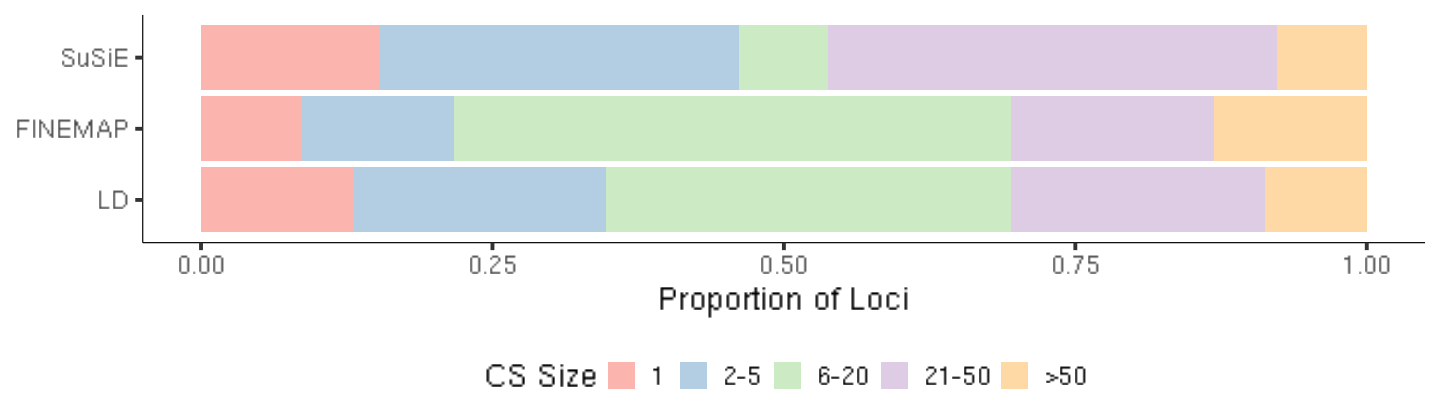

In [35]:
options(repr.plot.width=12, repr.plot.height=3.5)

dplyr::bind_rows(
    ld.tags %>%
        dplyr::mutate(Method="LD") %>%
        dplyr::select(Method, Gene, N.SNPs=NTAG),
    susie.snps %>%
        dplyr::count(Gene) %>%
        dplyr::mutate(Method="SuSiE") %>%
        dplyr::select(Method, Gene, N.SNPs=n),
    finemap.snps %>%
        dplyr::count(Gene) %>%
        dplyr::mutate(Method="FINEMAP") %>%
        dplyr::select(Method, Gene, N.SNPs=n)
) %>%
    dplyr::mutate(CS.Size=cut(N.SNPs, breaks=c(0, 1, 5, 20, 50, Inf), labels=c("1", "2-5", "6-20", "21-50", ">50"), include.lowest=F)) %>%
    dplyr::mutate(Method=factor(Method, levels=c("LD", "FINEMAP", "SuSiE"))) %>%
    dplyr::group_by(Method, CS.Size) %>%
    dplyr::summarize(N=n(), .groups="drop") %>%
    dplyr::group_by(Method) %>%
    dplyr::mutate(Freq=N / sum(N)) %>%
    ggplot() +
    geom_bar(aes(x=Method, y=Freq, fill=CS.Size), stat="identity", position=position_stack(reverse=T)) +
    scale_fill_brewer("CS Size", palette="Pastel1") +
    ylab("Proportion of Loci") +
    coord_flip() +
    ggplot_theme +
    theme(axis.title.y=element_blank())

ggsave("01_Colocalization/results/cis_pqtl_cs_sizes.pdf", width=12, height=3.5)

## Paired Tests of Credible Sets

Combine all credible set sizes based on SuSiE results to perform paired tests.

In [93]:
cs.sizes <- merge(
    susie.snps %>%
        dplyr::count(Gene, name="SuSiE.N.SNPs") %>%
        dplyr::select(Gene, SuSiE.N.SNPs),
    finemap.snps %>%
        dplyr::filter(Credibility_Set_Min_LD >= 0.5) %>%
        dplyr::count(Gene, name="FINEMAP.N.SNPs"),
    by=c("Gene")
) %>%
    merge(., ld.tags, by=c("Gene")) %>%
    dplyr::select(Gene, SuSiE.N.SNPs, FINEMAP.N.SNPs, NTAG)

In [94]:
dim(cs.sizes)

[1] 13  4

The median size of the LD snp sets is much higher than FINEMAP and SuSiE when using the SuSiE pruned set. The FINEMAP median is much higher by itself (23) and the LD snp sets are actually smaller (12).

In [95]:
cs.sizes %>%
    tidyr::gather(key="Method", value="N.SNPs", -Gene) %>%
    dplyr::group_by(Method) %>%
    dplyr::summarize(Median.CS.Size=median(N.SNPs))

Method,Median.CS.Size
<chr>,<dbl>
FINEMAP.N.SNPs,20
NTAG,18
SuSiE.N.SNPs,20


## Trans-pQTL

### Load Data

In [100]:
trans.pqtl <- readRDS("~/gains_team282/proteomics/pqtl/pqtl_ms2019/trans_pqtl_all.RDS") %>%
    dplyr::group_by(pQTL_Protein) %>%
    dplyr::slice_min(pQTL_pval, n=1, with_ties=F)

In [106]:
ld.tags <- fread("~/gains_team282/nikhil/colocalization/cis_eqtl/fine_mapping/LD/trans_pqtl_snps.80r2.tags.tsv") %>%
    dplyr::mutate(NTAG = NTAG + 1) %>%
    dplyr::mutate(SNP = gsub(":", "\\.", SNP)) %>%
    merge(trans.pqtl, ., by="SNP")

In [107]:
head(ld.tags)

,SNP,Chr,Position,pQTL_beta,pQTL_SE,pQTL_t,pQTL_pval,pQTL_Protein,pQTL_Locus,CHR,BP,NTAG,LEFT,RIGHT,KBSPAN,TAGS
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>
1,rs11846959,14,94379979,-0.3065649,0.01614662,-18.986322,3.309735e-69,P00751,pQTL_1,14,94379979,5,94378225,94380555,2.331,rs2073333|rs1303|rs17090719|rs2070709
2,rs11846959,14,94379979,-0.2137874,0.01793464,-11.920362,6.923034e-31,P02787,pQTL_1,14,94379979,5,94378225,94380555,2.331,rs2073333|rs1303|rs17090719|rs2070709
3,rs16917722,8,95461382,-0.4991650,0.06949047,-7.183215,1.673847e-12,P35858,pQTL_1,8,95461382,33,95437139,95516982,79.844,rs28435534|rs74864598|rs16917667|rs1392797|rs28419508|rs116454494|rs78897914|rs16917715|rs73697818|rs75111460|rs75939204|rs76368529|rs868420|rs74586905|rs2318880|rs112753030|rs16917749|rs16917758|rs114275138|rs114577508|rs116004313|rs78447422|rs77136836|rs74630252|rs10102183|rs115026515|rs77090364|rs114315647|rs115818964|rs75942501|rs76137505|rs79279191
4,rs28929474,14,94378610,0.5651334,0.07657069,7.380545,3.282674e-13,Q92954,pQTL_1,14,94378610,2,94371805,94378610,6.806,rs112635299
5,rs9302635,16,72110275,0.1145890,0.01466176,7.815500,1.200982e-14,P10909,pQTL_1,16,72110275,4,72098230,72122767,24.538,rs11075921|rs9930957|rs35909200
6,rs9302635,16,72110275,0.1319606,0.01429908,9.228609,1.454631e-19,P19827,pQTL_1,16,72110275,4,72098230,72122767,24.538,rs11075921|rs9930957|rs35909200


In [119]:
susie.snps <- read.table("~/gains_team282/nikhil/colocalization/pqtl/fine_mapping/SuSiE/trans_pqtl_credible_sets.tsv", sep="\t", header=T) %>%
    as.data.frame() %>%
    dplyr::filter(is.na(Notes)) %>%
    dplyr::select(-Notes)

In [120]:
head(susie.snps)

,pQTL_ID,SNP,SNP_Prob,Credible_Set
,<chr>,<chr>,<dbl>,<int>
1,Q92954-pQTL_1,rs28929474,0.77718737,1
2,Q92954-pQTL_1,rs112635299,0.22281260,1
3,P35858-pQTL_1,rs16917722,0.05230981,1
4,P35858-pQTL_1,rs76368529,0.05230981,1
5,P35858-pQTL_1,rs868420,0.05230981,1
6,P35858-pQTL_1,rs74586905,0.05230981,1


For the FINEMAP result from each module QTL, we chose the $k$ that has the maximum posterior probability.

In [121]:
finemap.snps <- fread("~/gains_team282/nikhil/colocalization/pqtl/fine_mapping/FINEMAP/trans_credible_sets.tsv", sep="\t", header=TRUE) %>%
    as.data.frame() %>%
    dplyr::group_by(Gene) %>%
    dplyr::filter(Post_Prob_k == max(Post_Prob_k))

In [122]:
head(finemap.snps)

Gene,k,Post_Prob_k,Credibility_Set,Credibility_Set_Min_LD,Credibility_Set_Mean_LD,Credibility_Set_Median_LD,SNP,Prob_SNP_in_CS
<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
P00751-pQTL_1,10,1,1,1,1,1,rs7157940,1.000000
P00751-pQTL_1,10,1,2,1,1,1,rs56294923,1.000000
P00751-pQTL_1,10,1,3,1,1,1,rs79237142,1.000000
P00751-pQTL_1,10,1,4,1,1,1,rs8021015,1.000000
P00751-pQTL_1,10,1,5,1,1,1,rs11846959,0.866828
P00751-pQTL_1,10,1,5,1,1,1,rs1303,0.132143


### Chromosome 8

Starting with the chromosome 8 trans-pQTL for IGFALS. There are 33 SNPs tagging the lead SNP at $R^2 > 0.8$. Both SuSiE and FINEMAP predict one credible set for this locus. Both methods report 27 SNPs. Both report the exact same 27 SNPs. Both report seven SNPs with a top PIP, which is low in both cases. The top seven SNPs are also the same.

In [129]:
susie.snps %>%
    dplyr::filter(pQTL_ID == "P35858-pQTL_1") %>%
    dplyr::count(Credible_Set)

Credible_Set,n
<int>,<int>
1,27


In [130]:
finemap.snps %>%
    dplyr::filter(Gene == "P35858-pQTL_1") %>%
    dplyr::count(Credibility_Set)

Gene,Credibility_Set,n
<chr>,<int>,<int>
P35858-pQTL_1,1,27


In [134]:
length(intersect(susie.snps$SNP[susie.snps$pQTL_ID == "P35858-pQTL_1"], finemap.snps$SNP[finemap.snps$Gene == "P35858-pQTL_1"]))

[1] 27

In [139]:
susie.snps %>%
    dplyr::filter(pQTL_ID == "P35858-pQTL_1") %>%
    head(n=10)

,pQTL_ID,SNP,SNP_Prob,Credible_Set
,<chr>,<chr>,<dbl>,<int>
1,P35858-pQTL_1,rs16917722,0.05230981,1
2,P35858-pQTL_1,rs76368529,0.05230981,1
3,P35858-pQTL_1,rs868420,0.05230981,1
4,P35858-pQTL_1,rs74586905,0.05230981,1
5,P35858-pQTL_1,rs2318880,0.05230981,1
6,P35858-pQTL_1,rs112753030,0.05230981,1
7,P35858-pQTL_1,rs16917749,0.05230981,1
8,P35858-pQTL_1,rs16917758,0.05092607,1
9,P35858-pQTL_1,rs114275138,0.05092607,1


In [147]:
finemap.snps %>%
    dplyr::filter(Credibility_Set_Min_LD >= 0.5) %>%
    dplyr::filter(Gene == "P35858-pQTL_1") %>%
    head(n=10)

Gene,k,Post_Prob_k,Credibility_Set,Credibility_Set_Min_LD,Credibility_Set_Mean_LD,Credibility_Set_Median_LD,SNP,Prob_SNP_in_CS
<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
P35858-pQTL_1,1,0.561658,1,0.97806,0.996133,1,rs16917749,0.0492548
P35858-pQTL_1,1,0.561658,1,0.97806,0.996133,1,rs868420,0.0492548
P35858-pQTL_1,1,0.561658,1,0.97806,0.996133,1,rs76368529,0.0492548
P35858-pQTL_1,1,0.561658,1,0.97806,0.996133,1,rs16917722,0.0492548
P35858-pQTL_1,1,0.561658,1,0.97806,0.996133,1,rs74586905,0.0492548
P35858-pQTL_1,1,0.561658,1,0.97806,0.996133,1,rs2318880,0.0492548
P35858-pQTL_1,1,0.561658,1,0.97806,0.996133,1,rs112753030,0.0492548
P35858-pQTL_1,1,0.561658,1,0.97806,0.996133,1,rs16917758,0.0480149
P35858-pQTL_1,1,0.561658,1,0.97806,0.996133,1,rs116004313,0.0480149


### Chromosome 14

In [152]:
susie.snps %>%
    dplyr::filter(pQTL_ID %in% c("P00751-pQTL_1", "P02787-pQTL_1", "Q92954-pQTL_1")) %>%
    dplyr::group_by(pQTL_ID, Credible_Set) %>%
    dplyr::summarize(n=n(), SNPs=paste0(SNP, collapse="|"), .groups="drop")

pQTL_ID,Credible_Set,n,SNPs
<chr>,<int>,<int>,<chr>
P00751-pQTL_1,1,3,rs11846959|rs1303|rs2073333
P00751-pQTL_1,2,1,rs7157940
P00751-pQTL_1,3,2,rs882269|rs3818119
P02787-pQTL_1,1,5,rs11846959|rs1303|rs2073333|rs17090719|rs2070709
Q92954-pQTL_1,1,2,rs28929474|rs112635299


In [157]:
susie.snps %>%
    dplyr::filter(pQTL_ID == "P00751-pQTL_1", Credible_Set == 1)

pQTL_ID,SNP,SNP_Prob,Credible_Set
<chr>,<chr>,<dbl>,<int>
P00751-pQTL_1,rs11846959,0.55539740,1
P00751-pQTL_1,rs1303,0.33108976,1
P00751-pQTL_1,rs2073333,0.09454664,1


In [155]:
susie.snps %>%
    dplyr::filter(pQTL_ID == "P02787-pQTL_1")

pQTL_ID,SNP,SNP_Prob,Credible_Set
<chr>,<chr>,<dbl>,<int>
P02787-pQTL_1,rs11846959,0.36146711,1
P02787-pQTL_1,rs1303,0.32998457,1
P02787-pQTL_1,rs2073333,0.18268478,1
P02787-pQTL_1,rs17090719,0.06845339,1
P02787-pQTL_1,rs2070709,0.05752510,1


In [153]:
susie.snps %>%
    dplyr::filter(pQTL_ID == "Q92954-pQTL_1")

pQTL_ID,SNP,SNP_Prob,Credible_Set
<chr>,<chr>,<dbl>,<int>
Q92954-pQTL_1,rs28929474,0.7771874,1
Q92954-pQTL_1,rs112635299,0.2228126,1


In [151]:
finemap.snps %>%
    dplyr::filter(Credibility_Set_Min_LD >= 0.5) %>%
    dplyr::filter(Gene %in% c("P00751-pQTL_1", "P02787-pQTL_1", "Q92954-pQTL_1")) %>%
    dplyr::group_by(Gene, Credibility_Set) %>%
    dplyr::summarize(n=n(), SNPs=paste0(SNP, collapse="|"), .groups="drop")

Gene,Credibility_Set,n,SNPs
<chr>,<int>,<int>,<chr>
P00751-pQTL_1,1,1,rs7157940
P00751-pQTL_1,2,1,rs56294923
P00751-pQTL_1,3,1,rs79237142
P00751-pQTL_1,4,1,rs8021015
P00751-pQTL_1,5,2,rs11846959|rs1303
P00751-pQTL_1,6,1,rs882269
P00751-pQTL_1,7,19,rs11621700|rs112596884|rs78198055|rs75682472|rs75362223|rs77627449|rs77130599|rs76717688|rs77341563|rs75947866|rs11851971|rs11850967|rs11629131|rs111228934|rs113018203|rs11627931|rs74447466|rs11622912|rs11622958
P00751-pQTL_1,8,1,rs74546140
P00751-pQTL_1,9,10,rs75213153|rs2093219|rs76793511|rs79448270|rs17129212|rs79746774|rs76325112|rs75632357|rs17129209|rs17129210


In [159]:
finemap.snps %>%
    dplyr::filter(Gene == "P00751-pQTL_1", Credibility_Set == 5)

Gene,k,Post_Prob_k,Credibility_Set,Credibility_Set_Min_LD,Credibility_Set_Mean_LD,Credibility_Set_Median_LD,SNP,Prob_SNP_in_CS
<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
P00751-pQTL_1,10,1,5,1,1,1,rs11846959,0.866828
P00751-pQTL_1,10,1,5,1,1,1,rs1303,0.132143


### Chromosome 16

In [160]:
susie.snps %>%
    dplyr::filter(pQTL_ID %in% c("P10909-pQTL_1", "P19827-pQTL_1")) %>%
    dplyr::group_by(pQTL_ID, Credible_Set) %>%
    dplyr::summarize(n=n(), SNPs=paste0(SNP, collapse="|"), .groups="drop")

pQTL_ID,Credible_Set,n,SNPs
<chr>,<int>,<int>,<chr>


In [161]:
finemap.snps %>%
    dplyr::filter(Credibility_Set_Min_LD >= 0.5) %>%
    dplyr::filter(Gene %in% c("P10909-pQTL_1", "P19827-pQTL_1")) %>%
    dplyr::group_by(Gene, Credibility_Set) %>%
    dplyr::summarize(n=n(), SNPs=paste0(SNP, collapse="|"), .groups="drop")

Gene,Credibility_Set,n,SNPs
<chr>,<int>,<int>,<chr>
P10909-pQTL_1,1,3,rs11647844|rs12925901|rs12708920
P10909-pQTL_1,2,1,rs11075908
P10909-pQTL_1,3,1,rs9921705
P10909-pQTL_1,4,1,rs34156336
P10909-pQTL_1,5,1,rs9923575
P10909-pQTL_1,6,1,rs16970933
P10909-pQTL_1,7,1,rs117507320
P10909-pQTL_1,8,1,rs12447416
P10909-pQTL_1,9,1,rs6499566


In [163]:
finemap.snps %>%
    dplyr::filter(Gene == "P10909-pQTL_1", Credibility_Set == 1)

Gene,k,Post_Prob_k,Credibility_Set,Credibility_Set_Min_LD,Credibility_Set_Mean_LD,Credibility_Set_Median_LD,SNP,Prob_SNP_in_CS
<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
P10909-pQTL_1,10,1,1,1,1,1,rs11647844,0.366129
P10909-pQTL_1,10,1,1,1,1,1,rs12925901,0.316936
P10909-pQTL_1,10,1,1,1,1,1,rs12708920,0.316936


In [164]:
finemap.snps %>%
    dplyr::filter(Gene == "P19827-pQTL_1", Credibility_Set == 1)

Gene,k,Post_Prob_k,Credibility_Set,Credibility_Set_Min_LD,Credibility_Set_Mean_LD,Credibility_Set_Median_LD,SNP,Prob_SNP_in_CS
<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
P19827-pQTL_1,10,1,1,1,1,1,rs12925901,0.333333
P19827-pQTL_1,10,1,1,1,1,1,rs12708920,0.333333
P19827-pQTL_1,10,1,1,1,1,1,rs11647844,0.333333
